In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#Load the dataset
df = pd.read_csv('forestfires.csv')

#Print the first 5 rows of the dataframe.
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


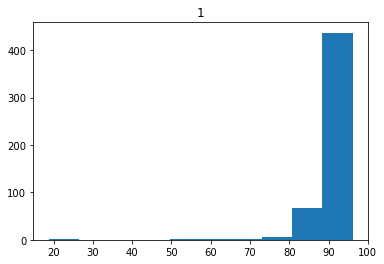

<Figure size 432x288 with 0 Axes>

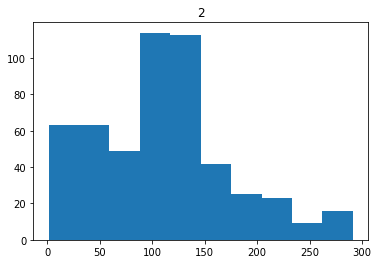

<Figure size 432x288 with 0 Axes>

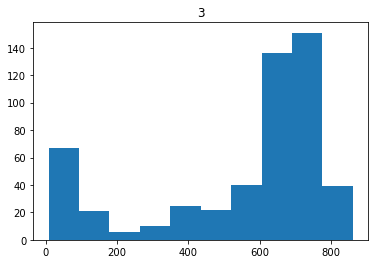

<Figure size 432x288 with 0 Axes>

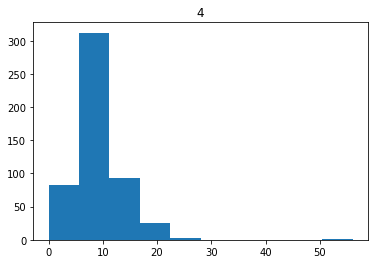

<Figure size 432x288 with 0 Axes>

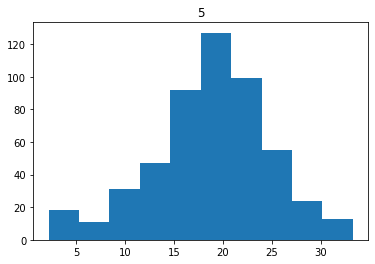

<Figure size 432x288 with 0 Axes>

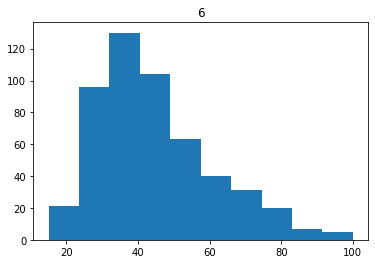

<Figure size 432x288 with 0 Axes>

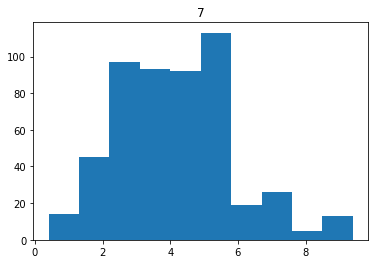

<Figure size 432x288 with 0 Axes>

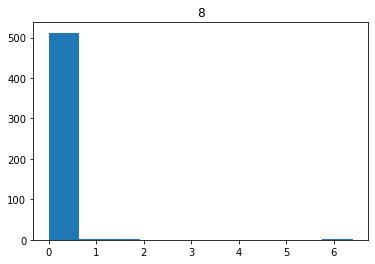

<Figure size 432x288 with 0 Axes>

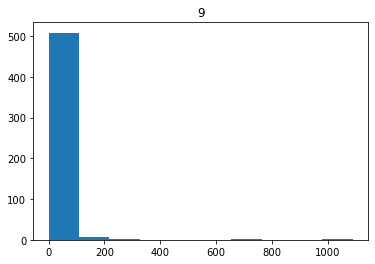

<Figure size 432x288 with 0 Axes>

In [15]:
for i in range(4,13):
    plt.figure(figsize=(6.0,4.0))
    plt.title(label=i-3)
    plt.hist(df.iloc[:,i])
    plt.show()
    plt.clf()

I think the feature  "FFMC,DMC,DC,ISI,temp,RH,wind,rain" is most most useful.
Because other data except area which is not related with the Forest Fires,which only record the time and location.But "FFMC,DMC,DC,ISI,temp,RH,wind,rain" is logicly related with the fire happenning.

In [16]:
from sklearn.model_selection import train_test_split

x=df[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']].values
y=df['area'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=3)



In [18]:
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))


model1=tree.DecisionTreeRegressor(max_depth=1)
model1.fit(x_train,y_train)
predict1 = model1.predict(x_test)


print("model1:")
print("score is：", model1.score(x_test, y_test))
print("R_squared is：",r2_score(y_test, predict1))
print("mean_squared_error is:", mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(predict1)))



model1:
score is： 0.03426103890397014
R_squared is： 0.03426103890397014
mean_squared_error is: 0.8202463090798695


I change the max_depth of decisionTree.I find that the cut the depth can make the error descend.  


In [19]:
print("model2:")
model2=tree.DecisionTreeRegressor(max_depth=3)
model2.fit(x_train,y_train)
predict2 = model2.predict(x_test)
print("score is：", model2.score(x_test, y_test))
print("R_squared is：",r2_score(y_test, predict2))
print("mean_squared_error is:", mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(predict2)))


model2:
score is： -0.005436990346710413
R_squared is： -0.005436990346710413
mean_squared_error is: 0.8539636626115735
